In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from sklearn.utils import shuffle
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import numpy as np
from numpy import genfromtxt

In [7]:
#Importing dataset
X=np.zeros((847,1,8000))
Y=np.zeros((847,2))


for i in range(847):
  my_data = genfromtxt("C:/Users/dianu/Downloads/SM/SM_Gen/SM"+str(i+1)+".csv", delimiter=',')
  my_data2 = genfromtxt("C:/Users/dianu/Downloads/SMy/SM_id_Gen/SMy"+str(i+1)+".csv", delimiter=',')
  X[i,0,:]=my_data
  Y[i,:]=my_data2

In [8]:
# Randomizing dataset
X, Y = shuffle(X, Y)

In [9]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)

# Train

X_train = X[:split_train, [0],:]; y_train=Y[:split_train, :]

# Valid

X_valid = X[split_train:split_valid, [0],:]; y_valid=Y[split_train:split_valid,:]

# Test

X_test = X[split_valid:, [0],:]; y_test=Y[split_valid:,:]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(592, 1, 8000) (592, 2)
(170, 1, 8000) (170, 2)
(85, 1, 8000) (85, 2)


In [3]:
# Deep LSTM


model = Sequential()


model.add(LSTM(128, return_sequences=True, input_shape=(1,8000)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(2))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            4162048   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 4,557,058
Trainable params: 4,557,058
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Initializing training
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])

history=model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2,validation_data=(X_valid, y_valid))

Epoch 1/100
592/592 - 32s - loss: 2.3600 - acc: 0.6892 - val_loss: 1.0320 - val_acc: 0.8294
Epoch 2/100
592/592 - 6s - loss: 0.9259 - acc: 0.8176 - val_loss: 0.9878 - val_acc: 0.8529
Epoch 3/100
592/592 - 6s - loss: 0.8685 - acc: 0.8176 - val_loss: 0.9758 - val_acc: 0.8412
Epoch 4/100
592/592 - 6s - loss: 0.8546 - acc: 0.8209 - val_loss: 0.9274 - val_acc: 0.8235
Epoch 5/100
592/592 - 6s - loss: 0.8402 - acc: 0.8361 - val_loss: 1.0586 - val_acc: 0.8412
Epoch 6/100
592/592 - 6s - loss: 0.8311 - acc: 0.8311 - val_loss: 1.0947 - val_acc: 0.8706
Epoch 7/100
592/592 - 6s - loss: 0.7885 - acc: 0.8547 - val_loss: 0.7754 - val_acc: 0.8529
Epoch 8/100
592/592 - 6s - loss: 0.7127 - acc: 0.8564 - val_loss: 0.9919 - val_acc: 0.8294
Epoch 9/100
592/592 - 6s - loss: 0.6908 - acc: 0.8682 - val_loss: 0.6232 - val_acc: 0.8765
Epoch 10/100
592/592 - 6s - loss: 0.6298 - acc: 0.8767 - val_loss: 0.7336 - val_acc: 0.8647
Epoch 11/100
592/592 - 6s - loss: 0.5801 - acc: 0.8666 - val_loss: 0.6095 - val_acc: 0.8

592/592 - 6s - loss: 0.1969 - acc: 0.9274 - val_loss: 0.4070 - val_acc: 0.9118
Epoch 91/100
592/592 - 6s - loss: 0.1909 - acc: 0.9392 - val_loss: 0.3851 - val_acc: 0.9176
Epoch 92/100
592/592 - 6s - loss: 0.1592 - acc: 0.9392 - val_loss: 0.3023 - val_acc: 0.9118
Epoch 93/100
592/592 - 6s - loss: 0.1612 - acc: 0.9274 - val_loss: 0.2933 - val_acc: 0.9118
Epoch 94/100
592/592 - 6s - loss: 0.1812 - acc: 0.9476 - val_loss: 0.3320 - val_acc: 0.9059
Epoch 95/100
592/592 - 6s - loss: 0.2068 - acc: 0.9155 - val_loss: 0.3439 - val_acc: 0.9118
Epoch 96/100
592/592 - 6s - loss: 0.1767 - acc: 0.9392 - val_loss: 0.3397 - val_acc: 0.9000
Epoch 97/100
592/592 - 6s - loss: 0.1934 - acc: 0.9223 - val_loss: 0.3461 - val_acc: 0.9235
Epoch 98/100
592/592 - 6s - loss: 0.1670 - acc: 0.9274 - val_loss: 0.3145 - val_acc: 0.9118
Epoch 99/100
592/592 - 6s - loss: 0.1581 - acc: 0.9375 - val_loss: 0.3313 - val_acc: 0.9118
Epoch 100/100
592/592 - 6s - loss: 0.1630 - acc: 0.9409 - val_loss: 0.3219 - val_acc: 0.9235


Text(0.5, 1.0, 'Training and validation loss')

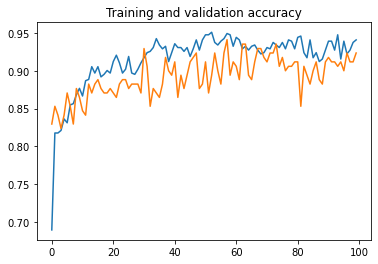

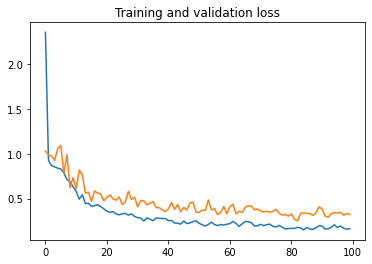

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [12]:
# Getting our predictions on unseen data
y_predictim=model.predict(X_test)

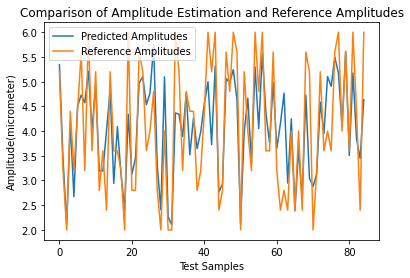

In [13]:
plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

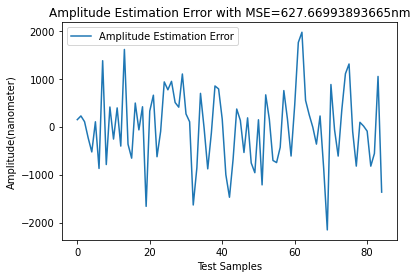

In [14]:
from sklearn.metrics import mean_squared_error
plt.plot(1000*(y_predictim[:,0]-y_test[:,0]),label="Amplitude Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(nanometer)')
plt.title('Amplitude Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,0], y_test[:,0]))+'nm')
plt.show()

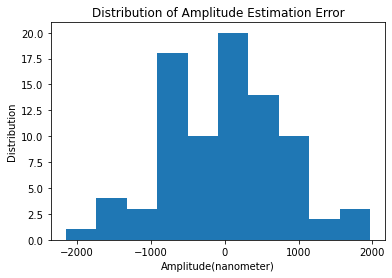

In [15]:
plt.hist(1000*(y_predictim[:,0]-y_test[:,0]), bins = 10)
plt.xlabel('Amplitude(nanometer)')
plt.ylabel('Distribution')
plt.title('Distribution of Amplitude Estimation Error')
plt.show()

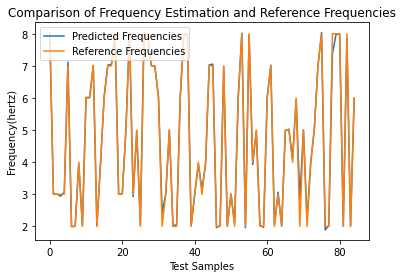

In [16]:
plt.plot(y_predictim[:,1],label="Predicted Frequencies")
plt.plot(y_test[:,1],label="Reference Frequencies")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(hertz)')
plt.title('Comparison of Frequency Estimation and Reference Frequencies')
plt.show()

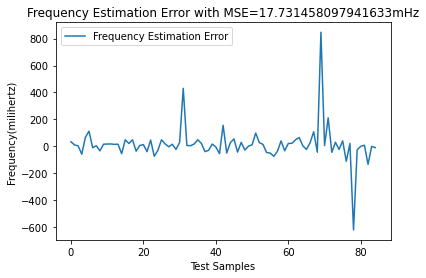

In [17]:
plt.plot(1000*(y_predictim[:,1]-y_test[:,1]),label="Frequency Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(milihertz)')
plt.title('Frequency Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,1], y_test[:,1]))+'mHz')
plt.show()

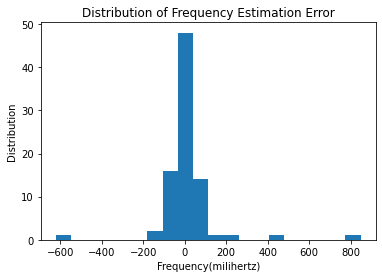

In [18]:
plt.hist(1000*(y_predictim[:,1]-y_test[:,1]), bins = 20)
plt.xlabel('Frequency(milihertz)')
plt.ylabel('Distribution')
plt.title('Distribution of Frequency Estimation Error')
plt.show()